<a href="https://colab.research.google.com/github/lemoon12/ml_edu/blob/master/ml_EDA/EDA_Discrete_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA with Housing Price Prediction 
## - Handling Discrete Variables


#### * 데이터 처리
      - 데이터 확인하기(수치형, 범주형 개수)
      - 연도 데이터 탐색(with 시각화)
      - 양적-이산형 데이터 탐색(with 시각화)
        + 시각화 > 확인 > 제거 > 가공 > 시각화
        + 시각화할 때 데이터명 리스트화 > FOR문으로 데이터(변수) 시각화
      - ID: 보자마자 삭제 < 패턴 X

## 1. 구글 드라이브 연동

In [ ]:
from google.colab import drive # 패키지 불러오기 
from os.path import join

In [ ]:
ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/ml_project/' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/ml_project/


In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/ml_project


In [ ]:
!ls

gender_submission.csv  house_price_train  submission.csv  test.csv  train.csv


## 2. 데이터 수집 및 EDA
- EDA 관련 필수 패키지 설치
  + EDA(Exploratory Data Analysis): 탐색적 데이터 분석
  + 데이터 분포, 변수간 관계 파악 위한 시각화 방법 동원

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from IPython.core.display import display, HTML
from pandas_profiling import ProfileReport

In [ ]:
# 차트의 크기, 선의 색, 두께 등 기본 값 설정 (rcParams)
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,4)   # 가로, 세로
plt.rcParams['lines.linewidth'] = 2   # 선의 색깔
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True  # 차트 내 격자선(grid) 표시 여부

### (1) 데이터 수집하기

In [ ]:
%pwd

'/content/drive/My Drive/Colab Notebooks/ml_project'

In [ ]:
train = pd.read_csv('house_price_train/train.csv')
test = pd.read_csv('house_price_train/test.csv')
print("data import is done")

data import is done


### (2) 데이터 확인하기
- 데이터셋 크기 확인하기
  + 변수의 갯수
  + Numeric 변수 / Categorical 변수 개수 파악
  + Kaggle의 테스트 데이터는 변수의 개수가 1개 더 작음

In [ ]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- Numerical 변수와 Categorical 변수 구분

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.columns)
print("The total number of numeric features are: ", len(numeric_features.columns))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The total number of numeric features are:  38


In [ ]:
categorical_features = train.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
print("The total number of numeric features are: ", len(categorical_features.columns))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
The total number of numeric features are:  43


## 3. 연도 데이터 탐색 개요

- numeric_features만 고려
  + id 삭제(패턴이 없는 데이터)
  + 테스트 데이터에 종속변수(salesprice) X
  + 매출 관련 데이터에 연,월,일 매우 중요
  > year 관련 데이터 컬럼 추출!

In [ ]:
year_fea = [fea for fea in numeric_features if 'Yr' in fea or 'Year' in fea]

In [ ]:
print(year_fea)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


### (1) 연도의 변수 처리 방법
- 새로운 데이터셋 만들더라도 항상 종속변수 같이 움직이기!
- 변수
  + YearBuilt: 건설연도
  + YearRemodAdd: 리모델연도
  + GarageYrBlt: 주차장 건설 연도
  + YrSold: 판매연도

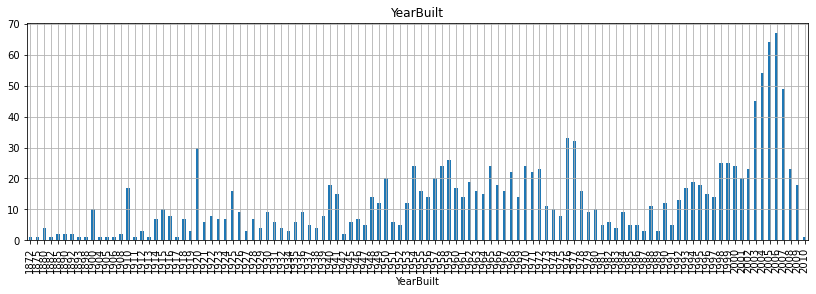

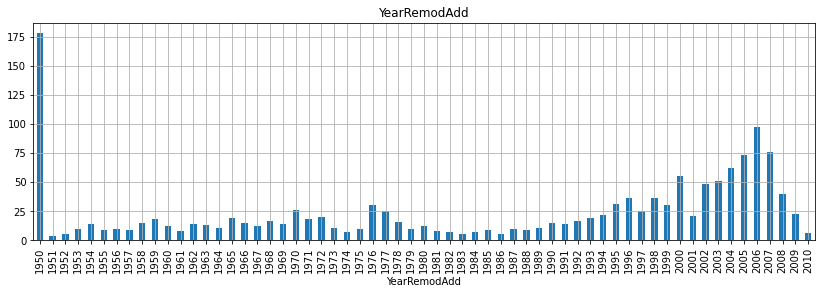

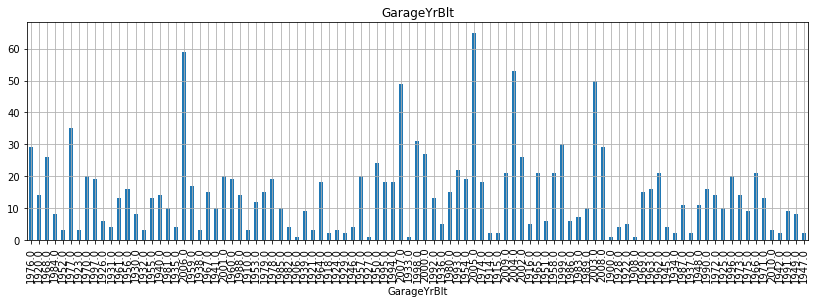

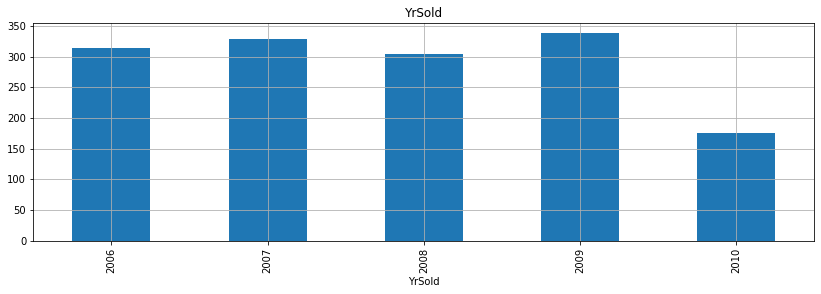

In [ ]:
for fea in year_fea:
  data = train.copy()
  data[fea].value_counts(sort=False).plot(kind='bar') # 해당 컬럼의 값인 연도들을 count
  plt.xlabel(fea)
  plt.title(fea)
  plt.show()

- 각 연도의 특성 이해 가능
  + 첫 건축 시기: 1872년
  + 첫 리모델링 시기: 1950년
  + 첫 차고 건축시기: 1930년
  + 매매 시기: 2006-2010년

### (2) SalePrice 와의 관계
- 판매 이전 연수에 따른 매매가 그래프 그리기
  + 연수가 짧을수록 매매가 하락 예상

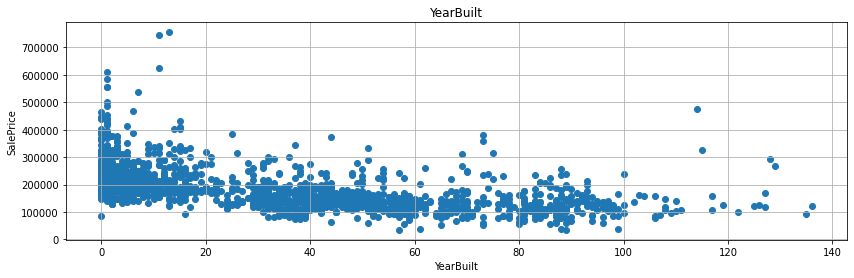

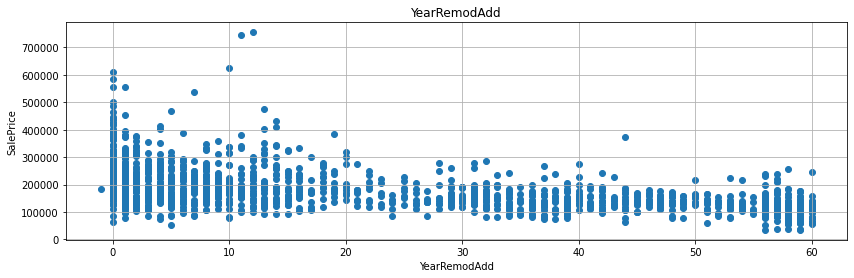

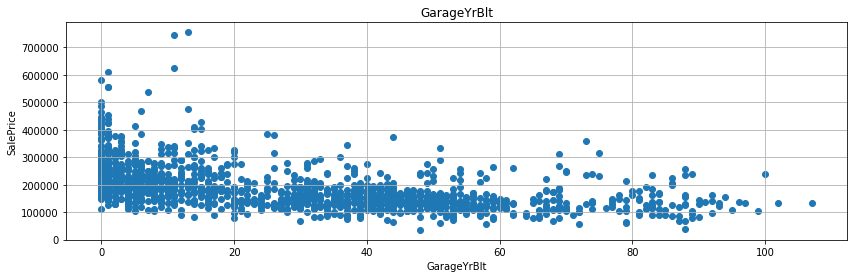

In [ ]:
for fea in year_fea:
  if fea!='YrSold': 
    data=train.copy()   # 'YrSold' 변수 제외
    data[fea] = data['YrSold']-data[fea]      # 연수 차이 계산
    plt.scatter(data[fea], data['SalePrice'])
    plt.title(fea)
    plt.xlabel(fea)
    plt.ylabel('SalePrice')
    plt.show()

- 연수의 차이가 작을수록 매매가 높음 확인

## 4. 양적 변수 시각화 - 이산형 그래프
- 양적변수 
  + 이산형 변수: 인원수, 개수 등
  + 연속형 변수: 온도, 키, 몸무게, 소득 등

### (1) 시각화 방법(Matplotlib, Seaborn)
  - 가상 데이터 예시
  - 이산형 그래프 단독
    + 이산형 그래프 단독으로 > 막대그래프, 개수 count

In [ ]:
# discrete dataframe
temp = pd.DataFrame({'id' : [1,2,3,4,5,6,7,8,9,10],
                    'number_of_room' : [2,4,3,2,4,3,3,3,4,2],
                    'SalePrice' : [1000,1300,2000,1030,2030,2050,2000,5000,3000,3500]
                    })
print(temp)

   id  number_of_room  SalePrice
0   1               2       1000
1   2               4       1300
2   3               3       2000
3   4               2       1030
4   5               4       2030
5   6               3       2050
6   7               3       2000
7   8               3       5000
8   9               4       3000
9  10               2       3500


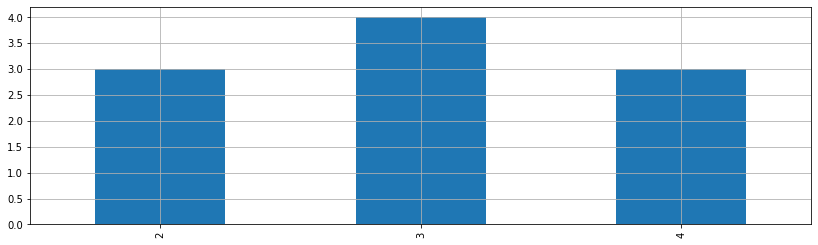

In [ ]:
temp['number_of_room'].value_counts(sort=False).plot.bar()
plt.show()

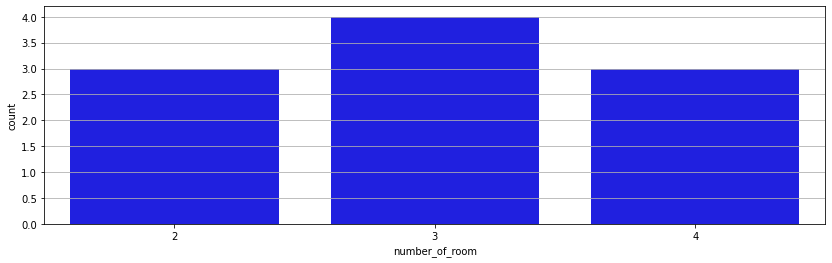

In [ ]:
sns.countplot(
    data= temp,
    x= "number_of_room", 
    color='blue'
)
plt.show()

- 이산형 변수와 SalePrice
  + SalePrice와 number_or_room 과의 관계 그래프 > boxplot 그래프
- boxplot 그래프: 수치 요약 5
  + 최솟값: 제 1사분위에서 1.5 IQR 뺀 위치
  + 제 1사분위: 25%의 위치
  + 제 2사분위: 50%의 위치 (중앙값)
  + 제 3사분위: 75%의 위치
  + 최댓값: 제 3사분위에서 1.5 IQR 더한 위치


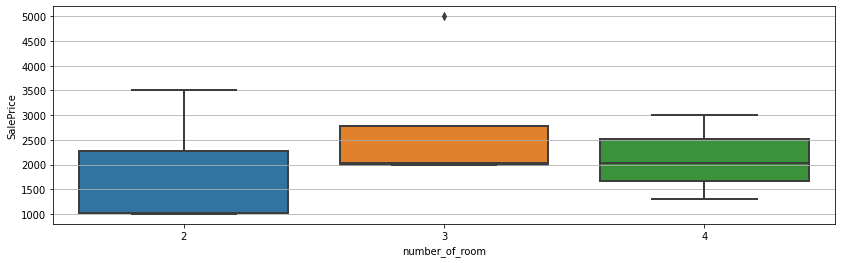

In [ ]:
sns.boxplot(x = "number_of_room", y = "SalePrice", data = temp)
plt.show()

### (2) 실무 데이터 적용
- numeric_features 에서 연속형 데이터와 이산형 데이터 구분!
  + unique() 함수로 유일한 값 추출 > 50개 이상(이하) > 연속형(discrete)
- year_fea와 id 제거

In [ ]:
discrete_vars=[fea for fea in numeric_features if len(train[fea].unique()) < 50 and fea not in year_fea + ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_vars)))

Discrete Variables Count: 17


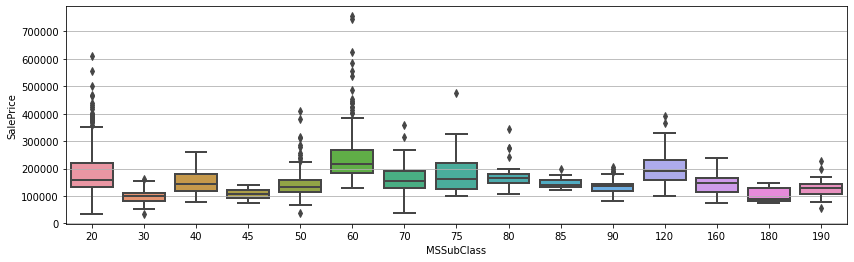

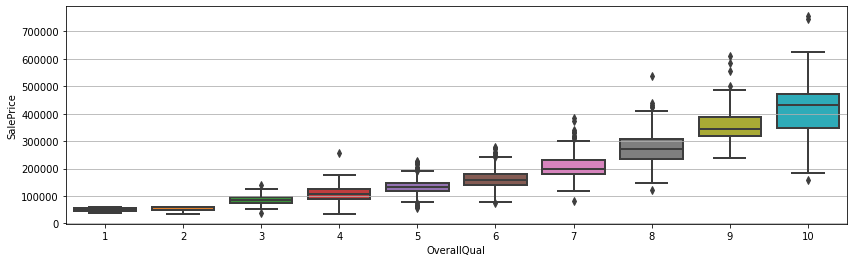

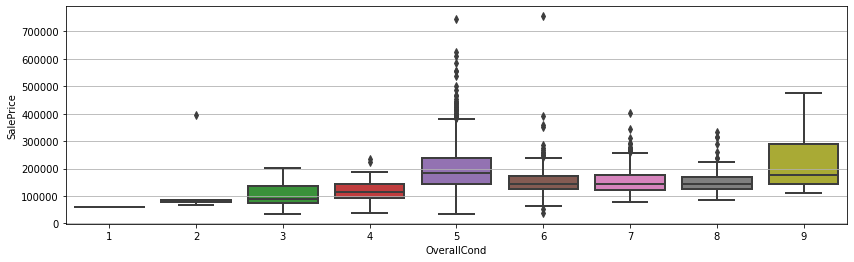

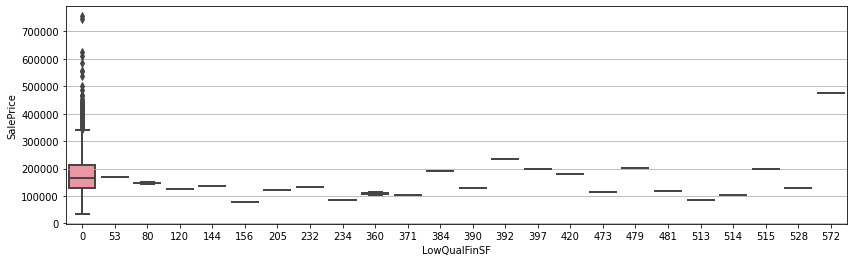

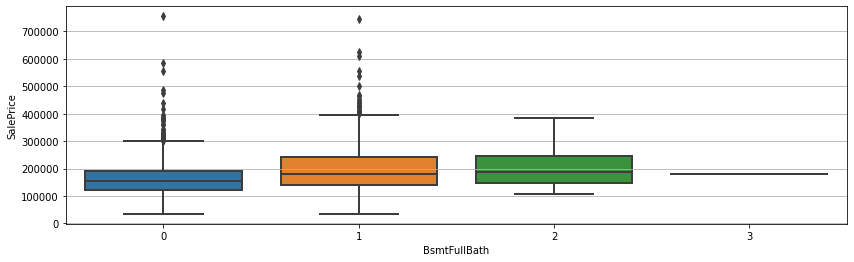

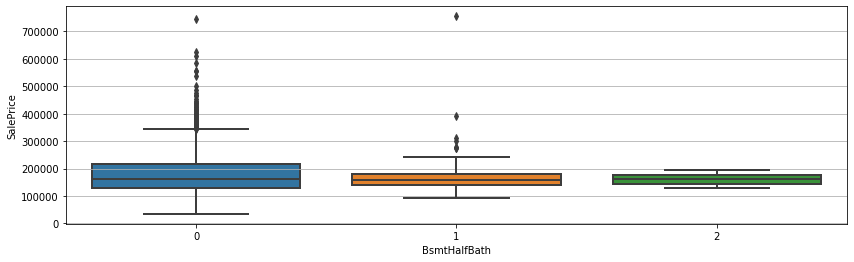

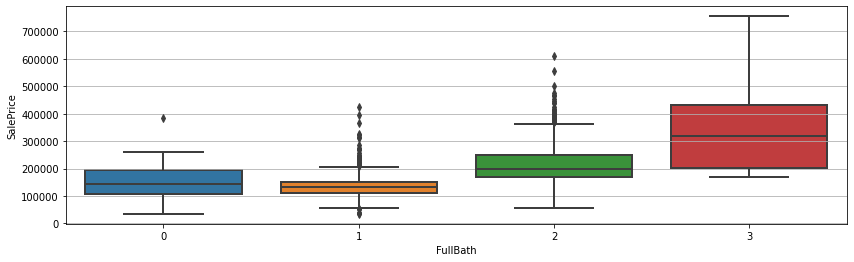

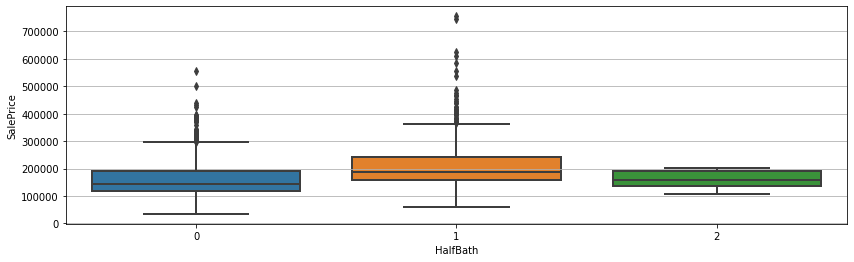

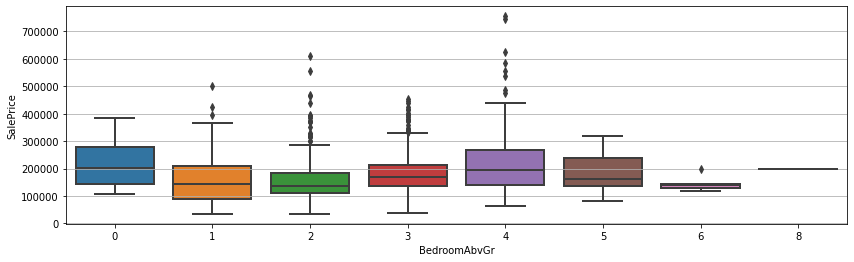

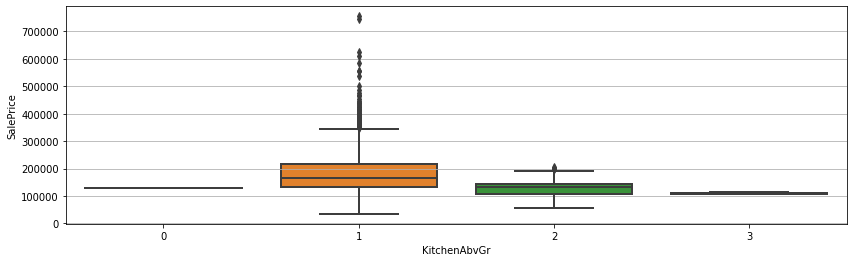

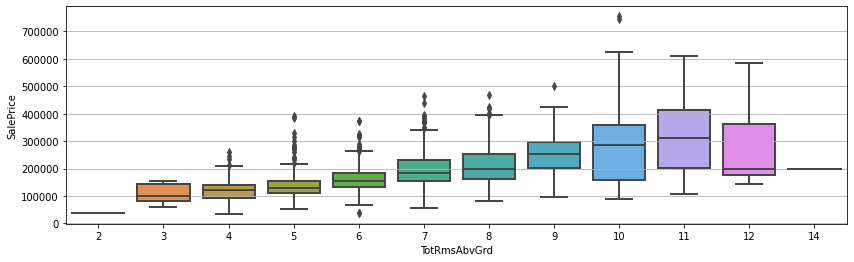

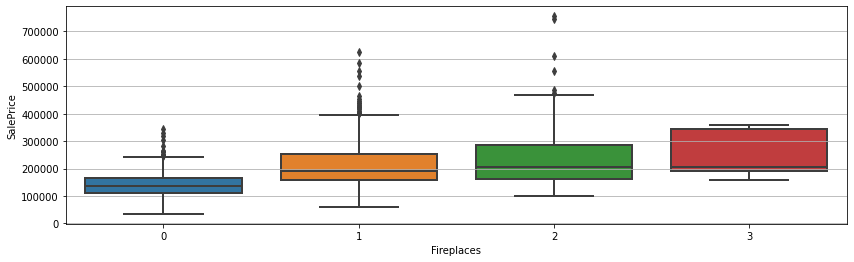

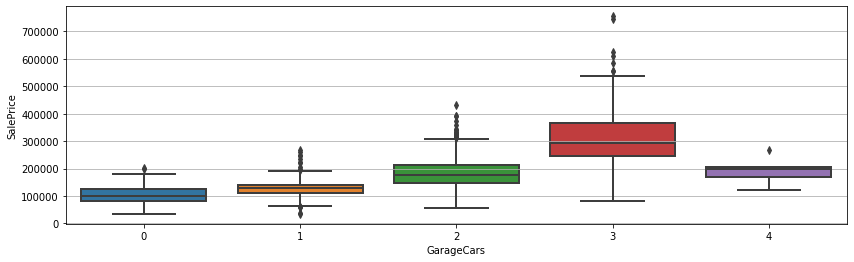

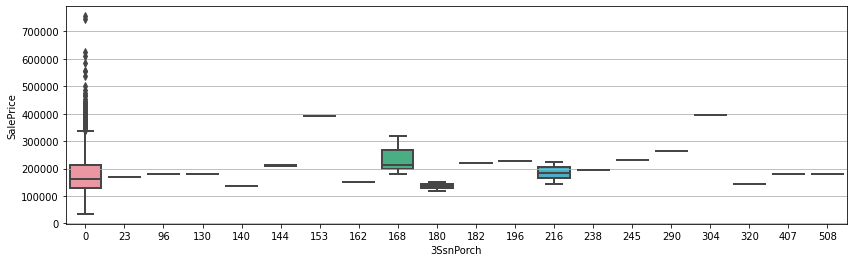

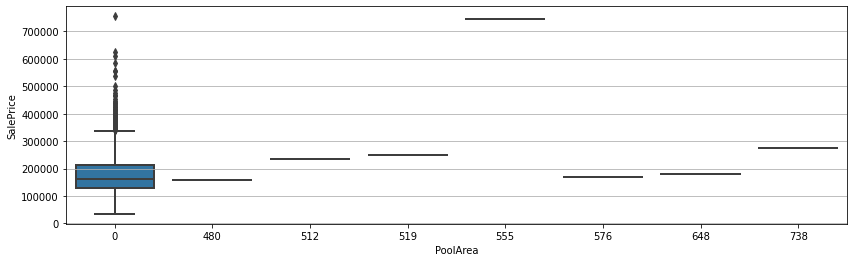

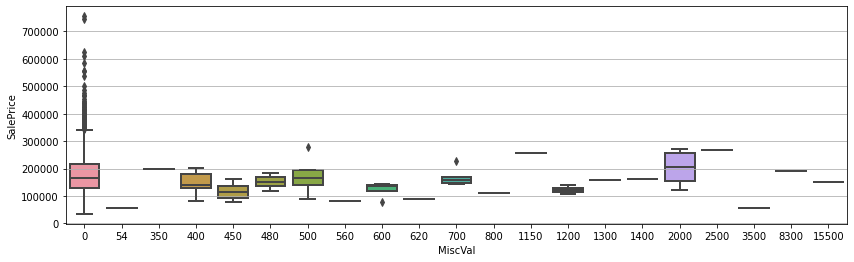

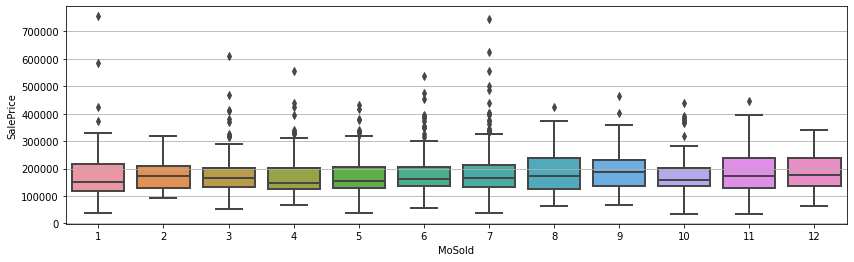

In [ ]:
for fea in discrete_vars:
  data = train.copy()
  sns.boxplot(x = fea, y='SalePrice', data = data)
  plt.show()

- 도움 안 되는 그래프 제거(구분X, 값이나타나지X)

In [ ]:
remove_vars = ['MiscVal','PoolArea','3SsnPorch','LowQualFinSF']
discrete_vars=[fea for fea in numeric_features if len(train[fea].unique()) < 50 and fea not in year_fea + remove_vars + ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_vars)))

Discrete Variables Count: 13


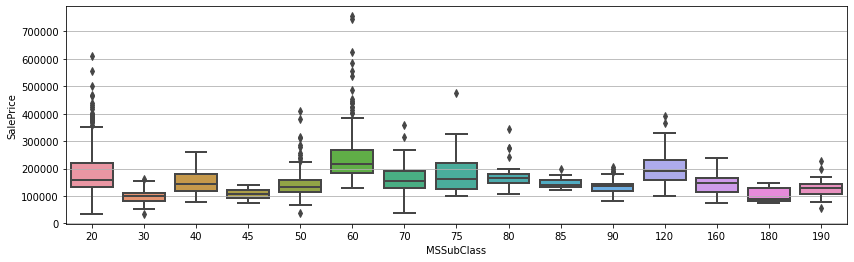

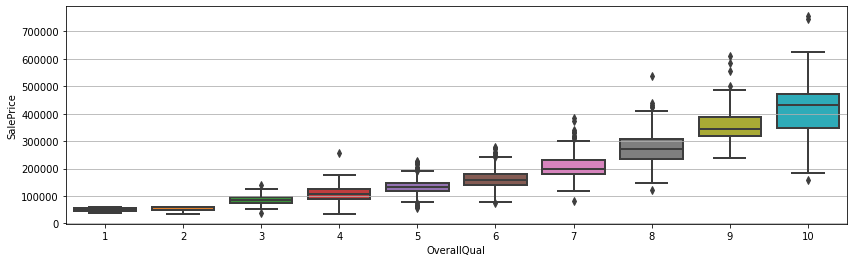

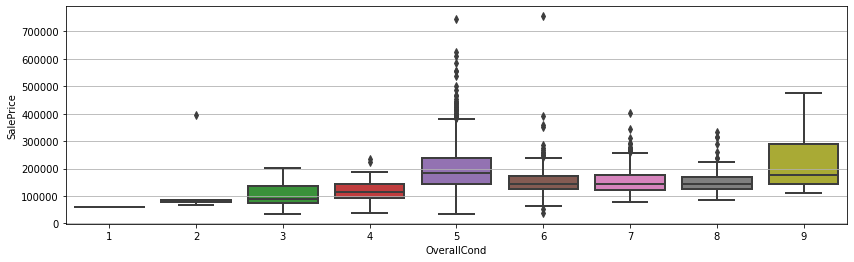

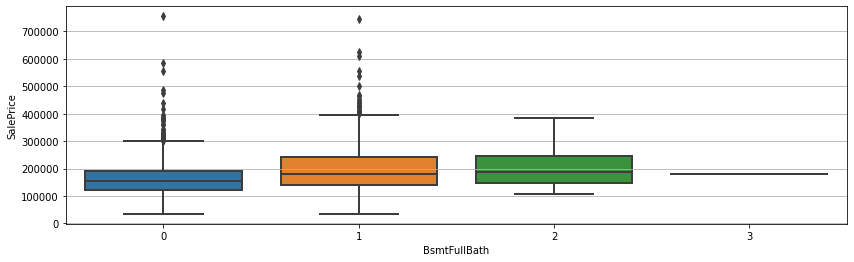

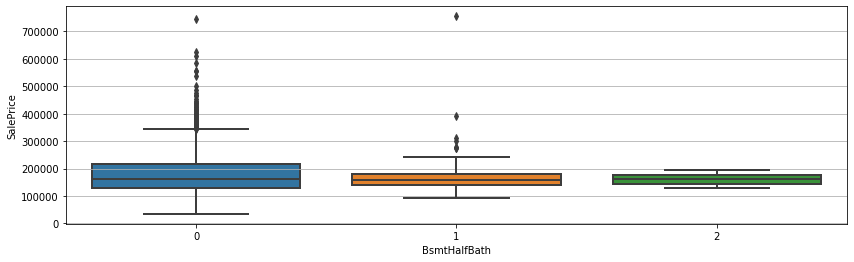

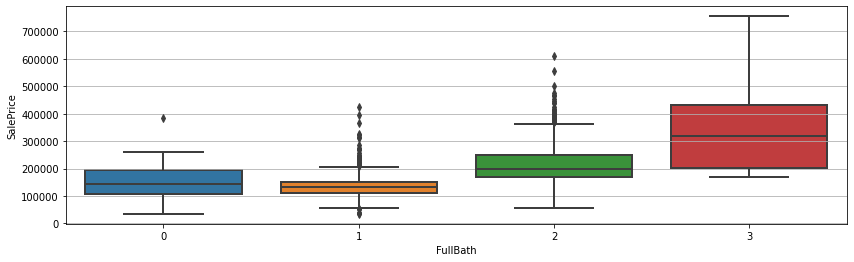

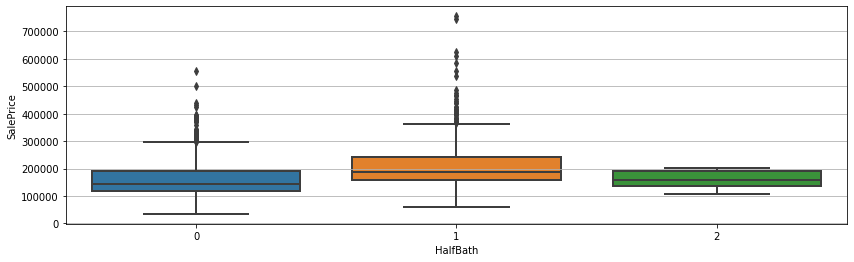

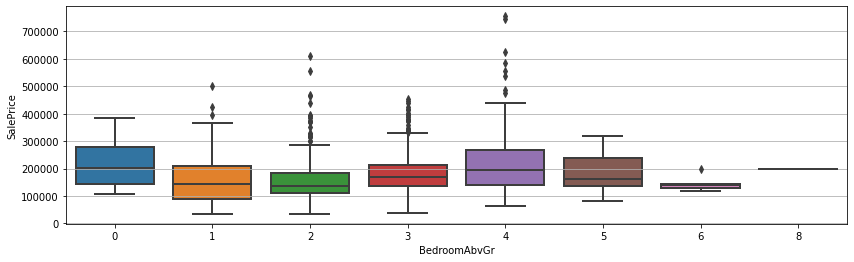

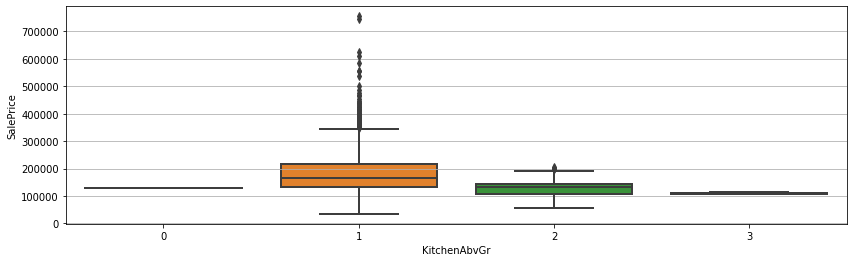

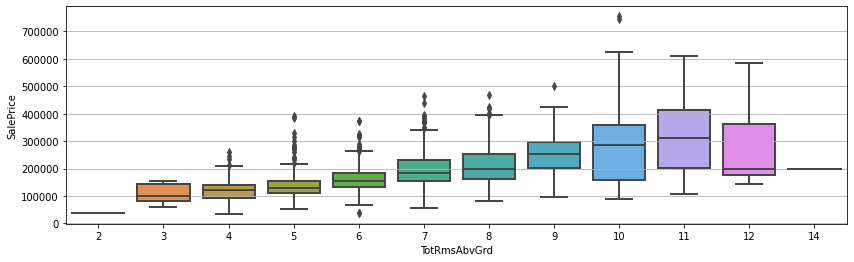

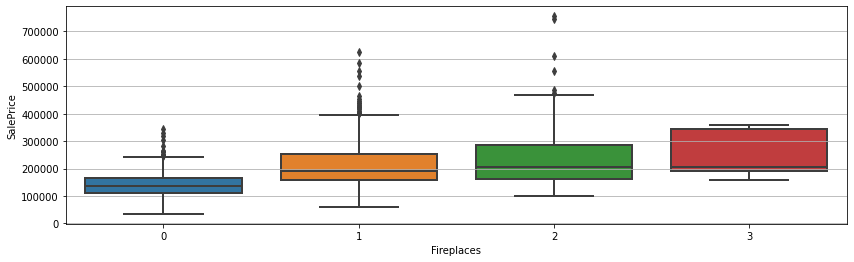

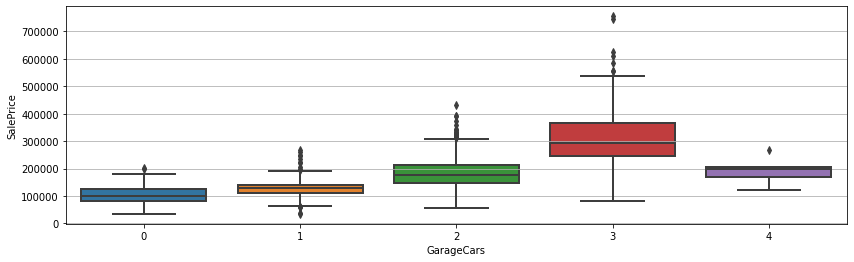

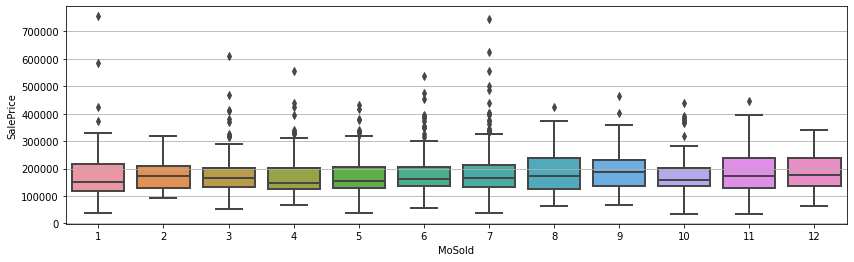

In [ ]:
for fea in discrete_vars:
  data = train.copy()
  sns.boxplot(x=fea, y ='SalePrice', data = data)
  plt.show()